<a href="https://colab.research.google.com/github/tavaresgani/portfolio-dados-e-ml/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical  # Substitui np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


###Reconhecimento de imagens

In [4]:
#download dos dados
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

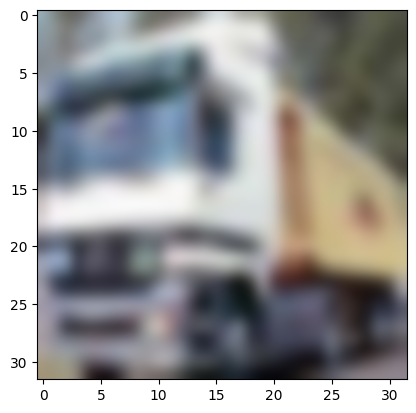

In [5]:
#visualizando uma imagem
image = x_train[1]
plt.imshow(image, interpolation='bicubic')
plt.show

In [7]:
#Formato dos dados
x_train.shape

(50000, 32, 32, 3)

###Transformando os dados

In [8]:
#Padronizar os dados
#converte para float 32 e / por 255 = (presença de cores)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

###Rede Neural

In [12]:
#Construindo a rede neural com 3 tipos de camadas
modelo = Sequential()
# Adiciona uma camada convolucional 2D
# 32 filtros de 3x3 são aplicados à entrada para extrair características iniciais
# ReLU adiciona não-linearidade; input_shape define o tamanho das imagens de entrada

modelo.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))

# Adiciona uma camada convolucional 2D
modelo.add(Conv2D(32, (3, 3), activation='relu'))

# Adiciona uma camada de pooling
# MaxPooling reduz as dimensões espaciais (altura e largura) pela metade
# Mantém as características mais importantes para evitar overfitting
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.25))

#Segundo Conjunto
modelo.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.25))


modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.25))

#Camada de saída
modelo.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Treinamento dos dados
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3594 - loss: 1.7374 - val_accuracy: 0.5862 - val_loss: 1.1565
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6132 - loss: 1.0968 - val_accuracy: 0.6866 - val_loss: 0.8894
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6823 - loss: 0.9015 - val_accuracy: 0.7197 - val_loss: 0.7939
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7179 - loss: 0.7935 - val_accuracy: 0.7395 - val_loss: 0.7455
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7487 - loss: 0.7204 - val_accuracy: 0.7489 - val_loss: 0.7277
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7666 - loss: 0.6514 - val_accuracy: 0.7592 - val_loss: 0.6999
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7886 - loss: 0.6024 - val_accuracy: 0.7727 - val_loss: 0.6635
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7987 - loss: 0.5

In [14]:
#fazer previsões
previsoes = modelo.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
previsoes

array([[5.79215266e-05, 5.25586831e-04, 2.81564280e-05, ...,
        2.02147985e-05, 8.04144423e-03, 1.68675277e-03],
       [2.69439165e-03, 7.78044574e-03, 4.66577776e-10, ...,
        4.97692870e-13, 9.89448667e-01, 7.65211735e-05],
       [1.21490784e-01, 6.52911933e-03, 1.60190379e-04, ...,
        1.53024928e-06, 8.67094636e-01, 4.68662148e-03],
       ...,
       [1.28400614e-04, 7.73111024e-05, 2.51118354e-02, ...,
        3.49410027e-02, 1.55186455e-04, 4.71751227e-05],
       [2.26509124e-02, 6.28301740e-01, 3.73299513e-03, ...,
        1.66159798e-03, 9.52977745e-04, 4.00288776e-03],
       [5.71946435e-10, 1.04474285e-11, 4.01949319e-06, ...,
        9.85699832e-01, 1.53879296e-12, 1.13547908e-12]], dtype=float32)

In [17]:
#previsoes em classe
previsoes_classes = np.argmax(previsoes, axis=1)
previsoes_classes

array([3, 8, 8, ..., 5, 1, 7])

In [18]:
y_test_classes = np.argmax(y_test, axis=1)
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [19]:
accuracy = accuracy_score(y_test_classes, previsoes_classes)
print("Acurácia:", accuracy)

Acurácia: 0.7726


In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
confusion = confusion_matrix(y_test_classes, previsoes_classes)
print("Matriz de Confusão:")
print(confusion)

Matriz de Confusão:
[[825  11  28   8  22   4   7  10  58  27]
 [ 17 864   3   2   7   1   8   1  28  69]
 [ 81   4 629  37  98  49  57  21  16   8]
 [ 30   8  49 545  92 156  56  30  22  12]
 [ 15   3  39  41 804  19  32  35  10   2]
 [ 16   1  34 147  59 668  25  39   4   7]
 [  8   1  23  50  41  18 844   3   8   4]
 [ 16   0  23  23  68  37   6 812   6   9]
 [ 47  19   7   7   5   1   6   3 889  16]
 [ 33  52   5  11   8   3   5   7  30 846]]
